In [1]:
from keyname import keyname as kn
import matplotlib.pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import ptitprince as pt
import seaborn as sns
from teeplot import teeplot


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: d4b32041fe1f
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 2
nbname: reconstruction-quality-plots
nbpath: /opt/hstrat-evolutionary-inference/binder/reconstruction-quality-plots.ipynb
revision: null
session: 47853ce2-9f16-42be-b577-50b82cbce856
timestamp: 2023-03-26T01:03:29Z00:00


IPython==7.16.1
keyname==0.5.2
yaml==6.0
matplotlib==3.7.1
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
seaborn==0.11.0
teeplot==0.5.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.0.3
json==2.0.9
six==1.16.0
ipykernel==5.5.3


In [3]:
df = pd.read_csv("https://osf.io/ck47r/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


6f7ca67df987a1b8


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,subsampling-fraction,tournament_size,treatment,trie-postprocess,_generation,_index,ext,_,triplet_distance,quartet_distance
0,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,29,...,0.01,2,20,naive,32768,832,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.098844e-14,-2.098824e-14
1,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,6,...,0.01,2,20,naive,32768,188,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.111658e-14,-2.111638e-14
2,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,34,...,1.00,2,20,rollback,32768,972,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.088371e-14,-2.088351e-14
3,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,17,...,1.00,2,20,expected,32768,496,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,1.428246e-03,5.220629e-03
4,reconstructed-tree,0,np.random.standard_normal,32768,1,8,0.01,3.051758e-08,32768,49,...,0.01,2,20,rollback,32768,1392,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.100494e-14,-2.100474e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100795,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,44,...,1.00,2,25,naive,262144,1257,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,6.865545e-04,2.452341e-03
100796,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,47,...,1.00,2,25,rollback,262144,1341,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.097384e-14,-2.097364e-14
100797,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,19,...,0.01,2,25,expected,262144,557,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,-2.106571e-14,-2.106551e-14
100798,reconstructed-tree,7,np.random.exponential,32768,1024,4,0.01,3.051758e-06,32768,6,...,1.00,2,25,rollback,262144,193,.csv.gz,/mnt/home/mmore500/scratch/data/hstrat-evoluti...,5.161053e-04,1.816271e-03


In [4]:
methodological_variables = [
#  'resolution',
 'subsampling-fraction',
 'trie-postprocess',  # pick one based on bias/accuracy
]

evolutionary_variables = [
 'mut_distn',  # sensitivity analysis
 'num_generations',  # sensitivity analysis
 'num_islands',
 'num_niches',
 'p_island_migration',  # sensitivity analysis
 'p_niche_invasion',  # sensitivity analysis
 'population_size',  # doesn't change
 'tournament_size',
]


In [5]:
df = df[
    (df['subsampling-fraction'] == 1.0) &
    (df['trie-postprocess'] == 'naive')
]


In [6]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]

df["sensitivity_analysis_variables"] = df[
    sensitivity_analysis_variables
].apply(kn.pack, axis=1)


<ipython-input-6-3cf00eb773c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sensitivity_analysis_variables"] = df[


In [7]:
df["regime"] = df.apply(
    lambda row: {
        (1, 1, 2, 3.0517578125e-08): "plain",
        (1, 1, 1, 3.0517578125e-08): "neutral_selection",
        (1, 1, 8, 3.0517578125e-08): "strong_selection",
        (1, 4, 2, 3.0517578125e-06): "weak_4_niche_ecology",
        (1, 4, 2, 3.0517578125e-08): "4_niche_ecology",
        (1, 8, 2, 3.0517578125e-08): "8_niche_ecology",
        (1024, 1, 2, 3.0517578125e-08): "spatial_structure",
    }.get(
        tuple(
            row[
                [
                    "num_islands",
                    "num_niches",
                    "tournament_size",
                    "p_niche_invasion",
                ]
            ]
        ),
        np.nan,  # default
    ),
    axis="columns",
)


<ipython-input-7-c2081544c9d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["regime"] = df.apply(


teeplots/./epoch=0+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


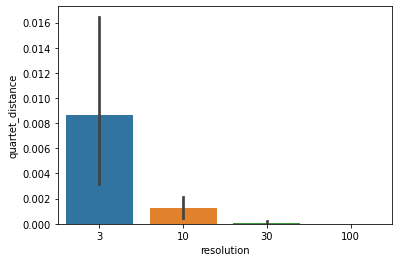

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


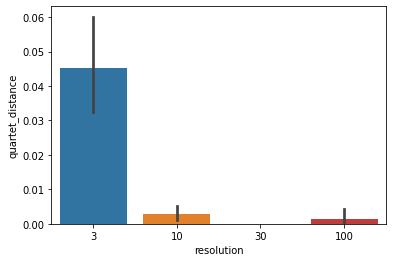

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


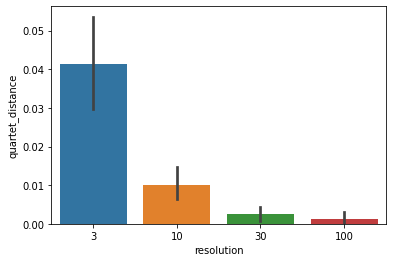

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


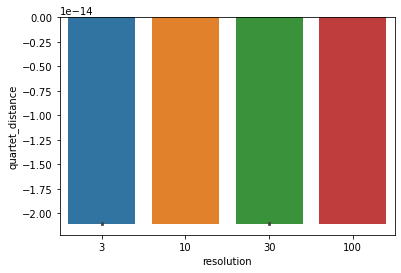

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


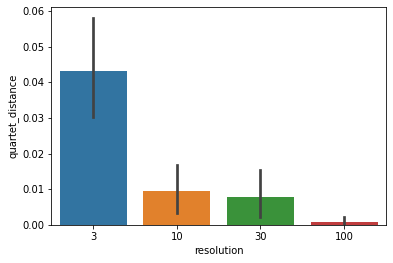

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


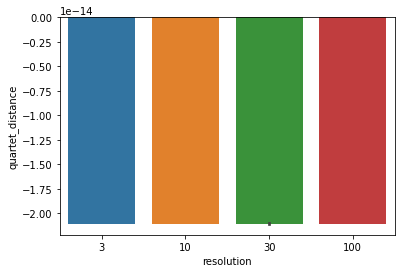

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


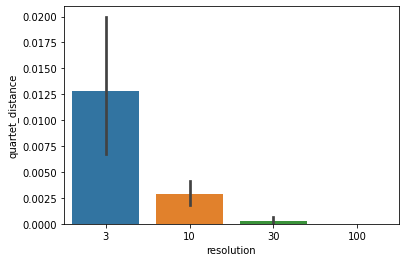

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


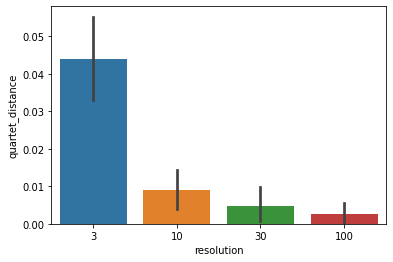

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


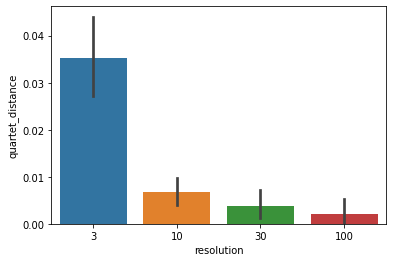

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


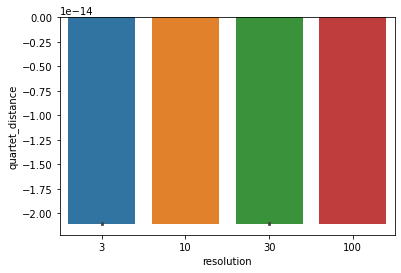

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


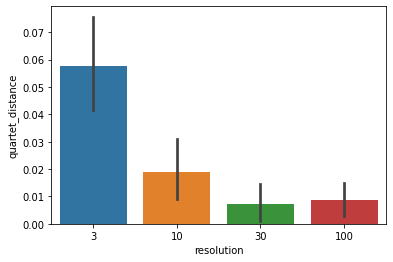

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


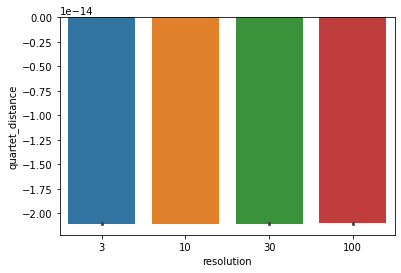

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


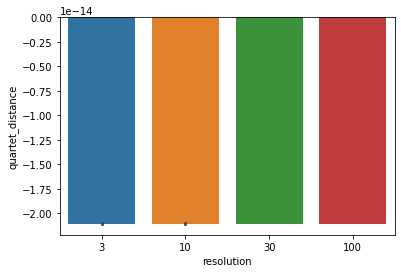

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


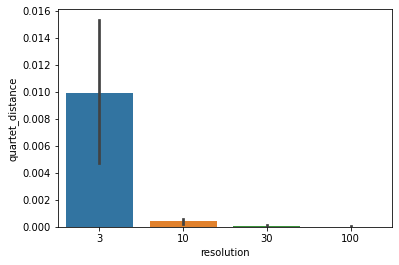

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


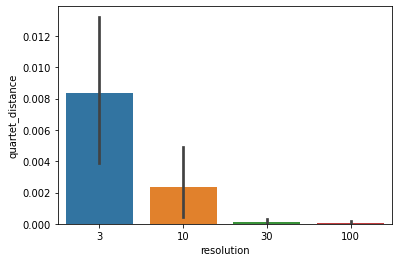

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


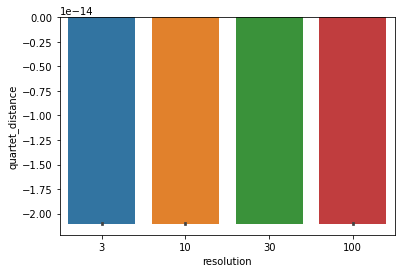

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


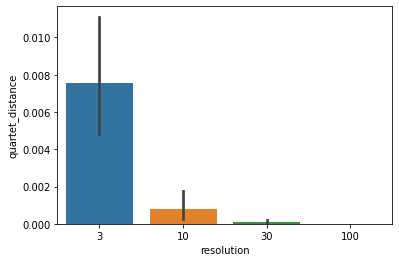

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


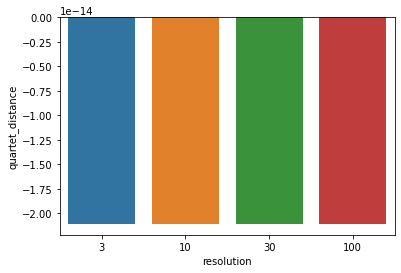

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


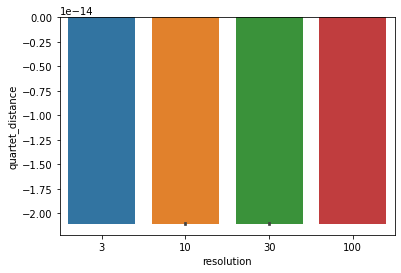

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


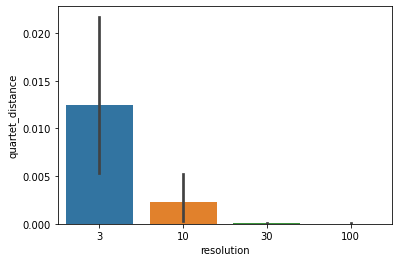

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


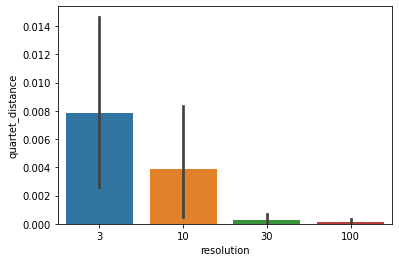

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


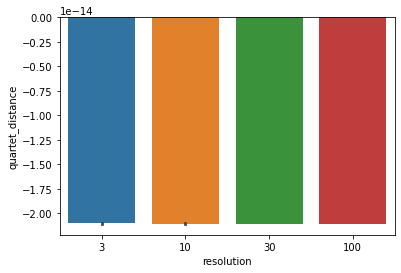

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


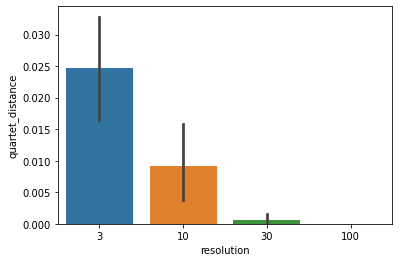

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


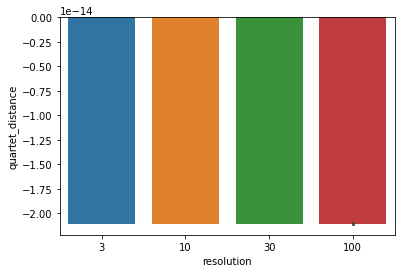

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


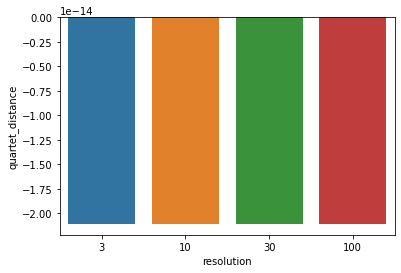

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


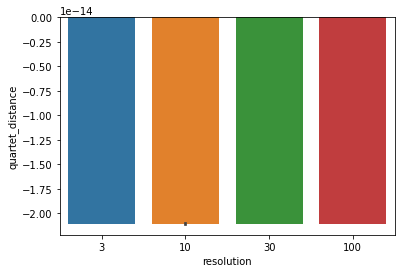

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


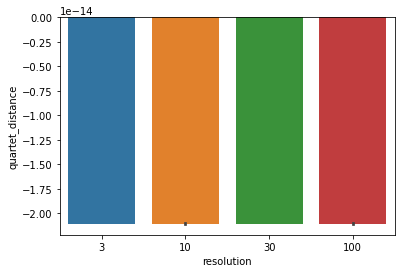

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


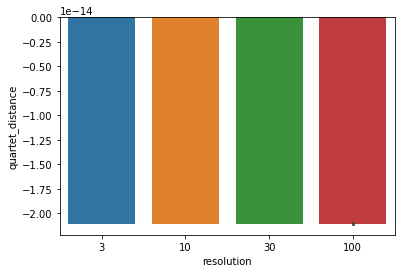

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


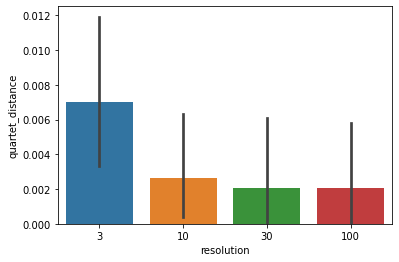

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


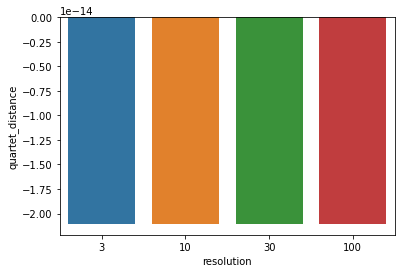

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


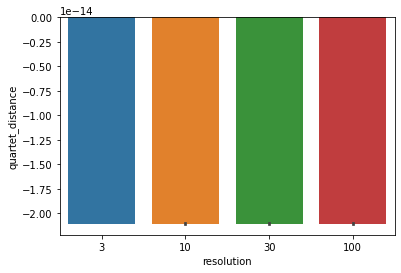

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


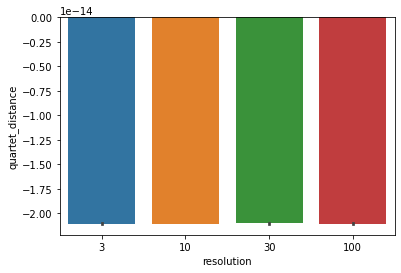

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=barplot+x=resolution+y=quartet-distance+ext=.png


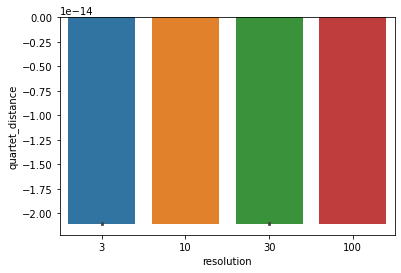

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=plain+viz=barplot+x=resolution+y=quartet-distance+ext=.png


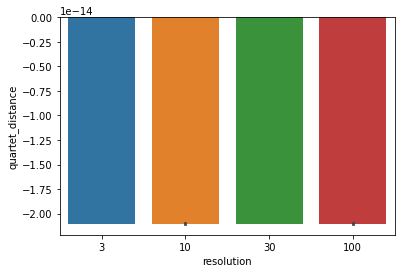

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=barplot+x=resolution+y=quartet-distance+ext=.png


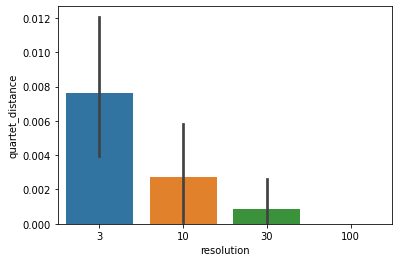

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=barplot+x=resolution+y=quartet-distance+ext=.png


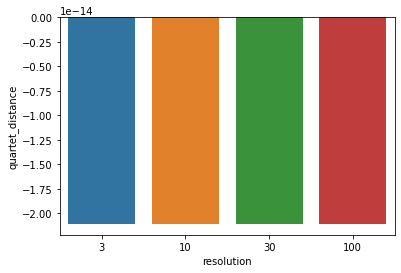

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


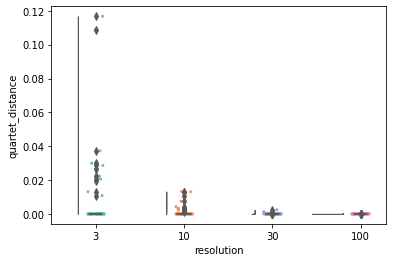

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


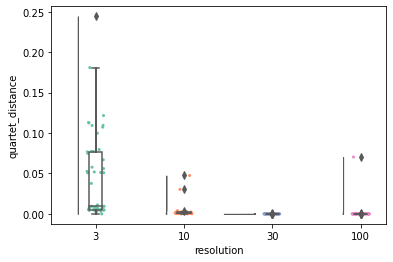

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


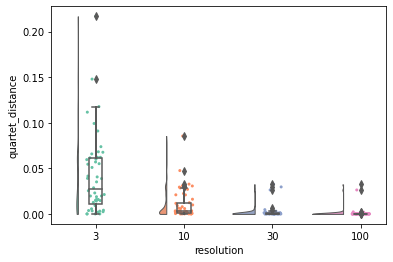

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


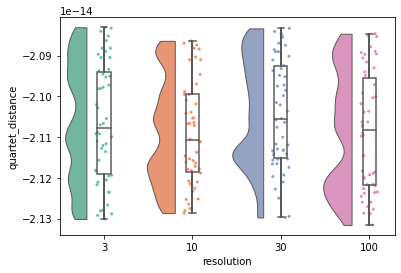

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


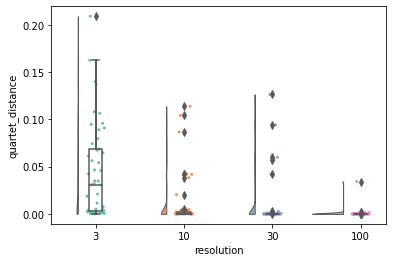

teeplots/./epoch=0+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


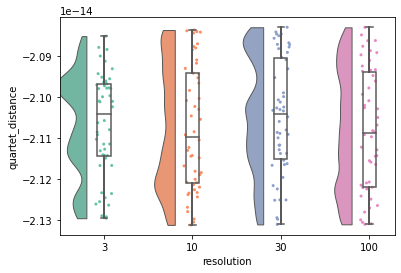

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


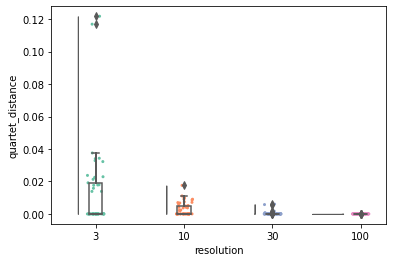

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


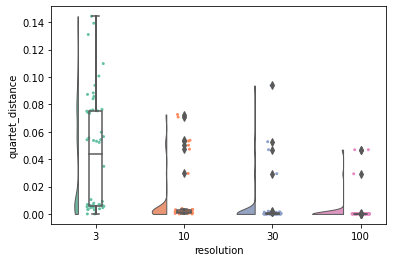

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


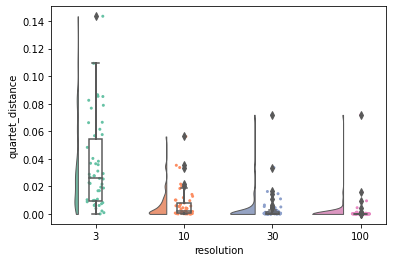

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


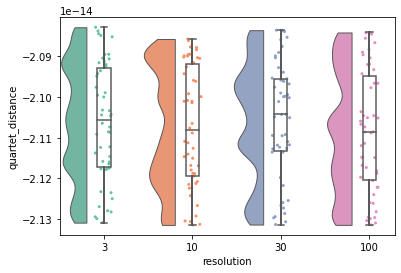

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


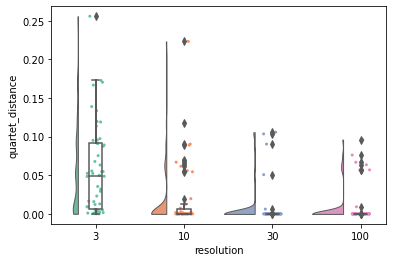

teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=0+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


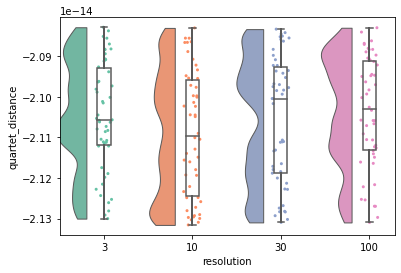

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


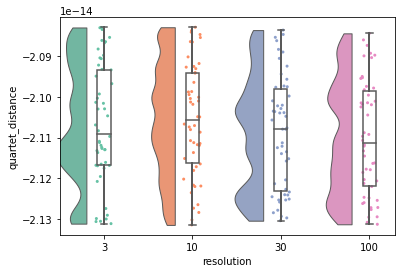

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


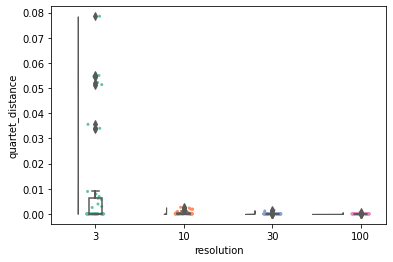

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


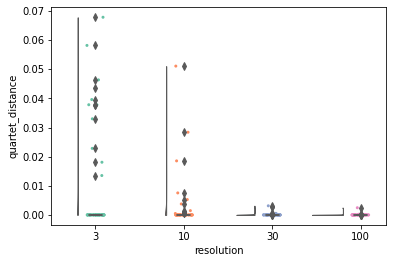

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


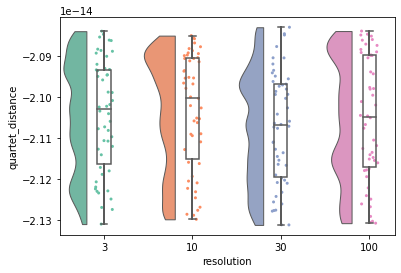

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


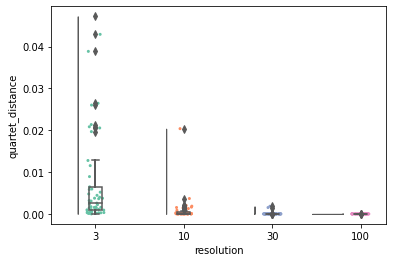

teeplots/./epoch=2+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


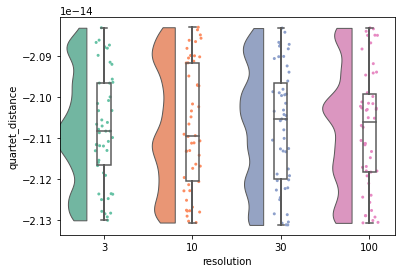

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


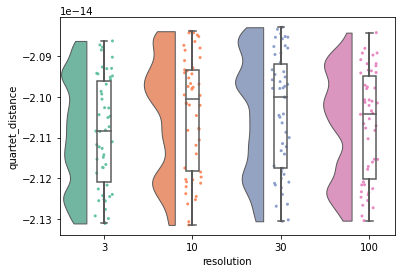

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


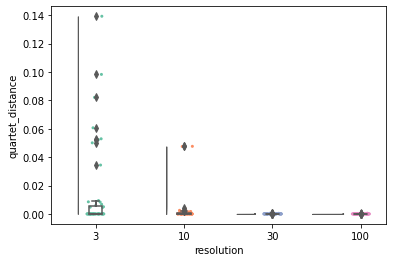

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


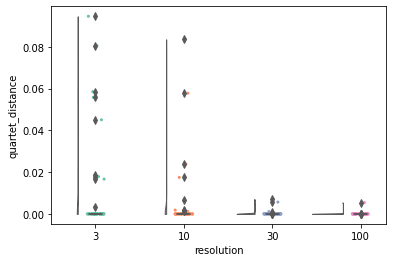

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


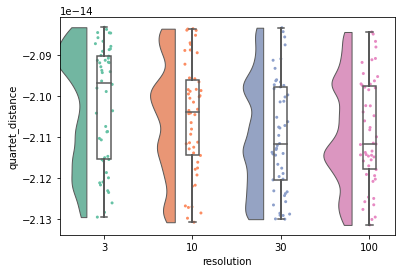

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


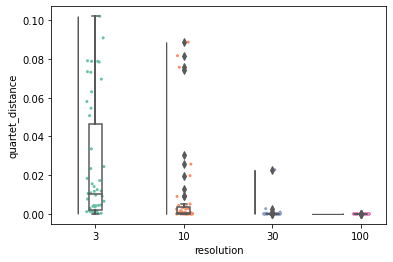

teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=2+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


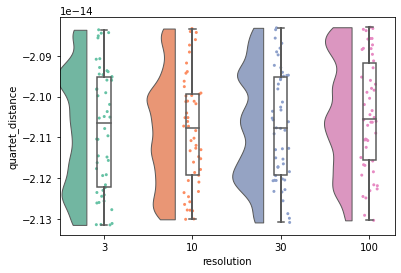

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


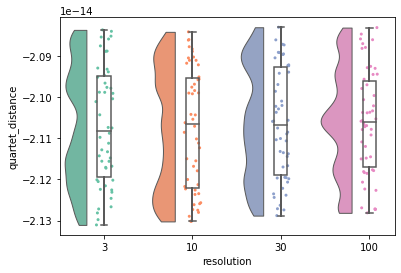

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


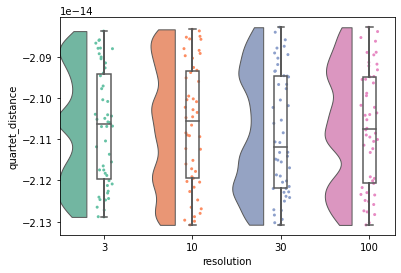

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


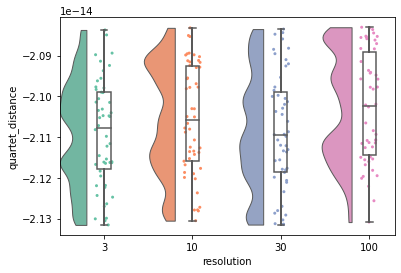

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


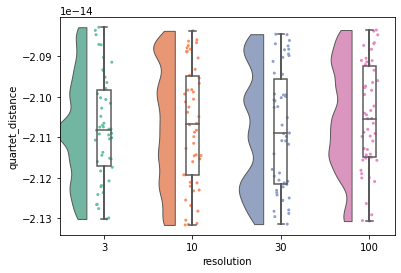

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


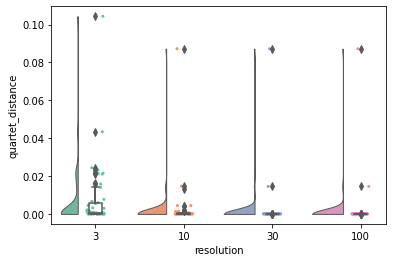

teeplots/./epoch=7+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.exponential+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


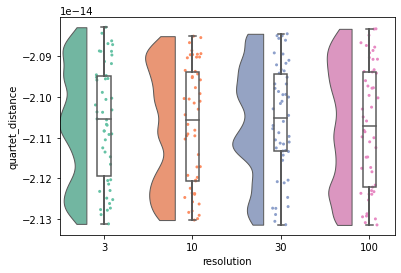

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


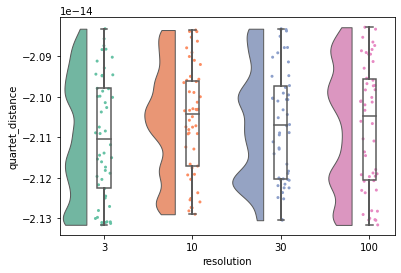

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=8_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


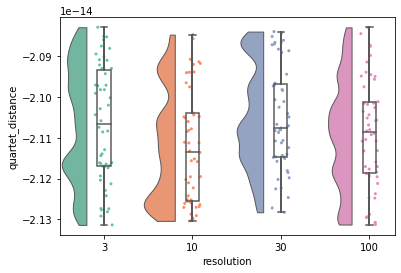

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=neutral_selection+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


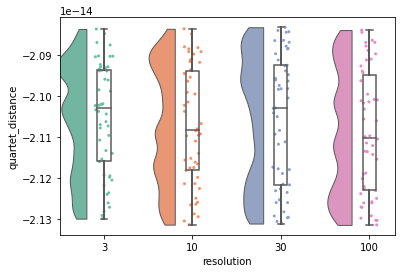

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=plain+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


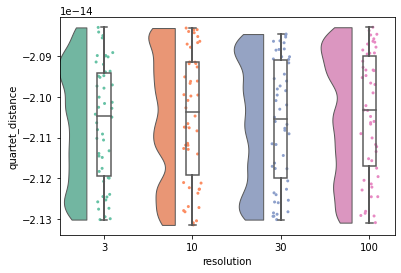

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=spatial_structure+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


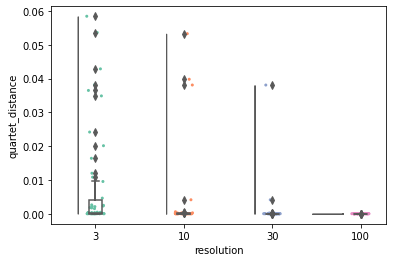

teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.pdf
teeplots/./epoch=7+mut_distn=np.random.standard_normal+regime=weak_4_niche_ecology+viz=raincloud+x=resolution+y=quartet-distance+ext=.png


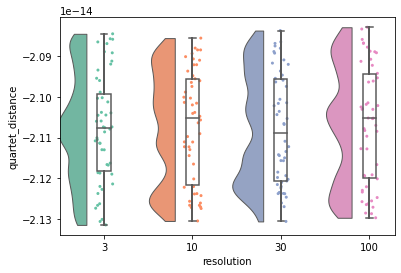

In [8]:
for viz in sns.barplot, pt.RainCloud:
    for group, group_df in df.groupby(sensitivity_analysis_variables + ['regime']):
        teeplot.tee(
            viz,
            data=group_df,
            x='resolution',
            y='quartet_distance',
            teeplot_outattrs={
                a: b for a, b in zip(sensitivity_analysis_variables + ['regime'], group)
            }
        )
        plt.show()
